# 1. Initial EDA 

## Performed initial EDA on first dataset, with some Machine-learning Models used to test its predictions.

### Used Dash to visualize the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Title: Predicting Population Growth Dynamics in Response to Economic and Environmental Factors

### Problem Statement:

#### In the modern world, population growth is influenced by a myriad of factors ranging from economic conditions to environmental events and governmental policies. Understanding the interplay between these variables is crucial for government agencies, policymakers, and international organizations to anticipate demographic trends and prepare accordingly. This understanding helps in crafting better-informed economic, environmental, and social policies that proactively manage resources and mitigate risks.
#### Our goal is to develop a predictive framework that integrates key indicators such as GDP growth, frequency and impact of natural disasters, and government spending patterns to:

#### 1. Forecast Population Growth: Determine the likely population growth rates by considering economic performance, environmental resilience, and public sector investments.
#### 2. Policy Impact Analysis: Understand how variations in these indicators correlate with changes in population dynamics, providing actionable insights for strategic resource allocation and developmental planning.

In [2]:
df = pd.read_csv('demographic.csv')
df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

#### Looking into the columns of the dataset, we decided to clean up and remove some of the redundant columns that does not help with our analysis

In [4]:
remove_columns = ['Population of children under the age of 5', 'Population under the age of 25', 
                  'Population older than 18 years',  'Population at age 1']

df = df.drop(columns=remove_columns)

In [5]:
print(f'Number of columns: {len(df.columns)}')
print(f'Length of df: {len(df)}')

Number of columns: 20
Length of df: 18288


In [6]:
print('Number of Unique Countries:', df['Country name'].nunique())
print('Total number of years:', df['Year'].nunique())

Number of Unique Countries: 254
Total number of years: 72


In [7]:
print(df.describe())

               Year    Population  Population of children under the age of 1  \
count  18288.000000  1.828800e+04                               1.828800e+04   
mean    1985.500000  1.264704e+08                               3.133497e+06   
std       20.783173  5.888512e+08                               1.416701e+07   
min     1950.000000  1.363000e+03                               2.500000e+01   
25%     1967.750000  2.915915e+05                               6.663750e+03   
50%     1985.500000  3.833998e+06                               8.835200e+04   
75%     2003.250000  1.678546e+07                               4.630005e+05   
max     2021.000000  7.909295e+09                               1.397837e+08   

       Population of children under the age of 15  \
count                                1.828800e+04   
mean                                 4.109523e+07   
std                                  1.884170e+08   
min                                  4.160000e+02   
25%           

In [8]:
# Function to find the growth rate of certain aspects of the dataset

def population_growth_rate(df, column):
    df.loc[:, ['Population Growth Rate']] = ((df[column].diff() / df[column].shift(1)) * 100).fillna(0)
    df.loc[population_growth['Year'] == 1950, 'Population Growth Rate'] = 0
    
    pivot_data = df.pivot(index = 'Year', columns = 'Country name', values = 'Population Growth Rate')
    print(pivot_data.head())
    
    return df

In [9]:
population_growth = df[['Country name', 'Year', 'Population']]
population_growth = population_growth_rate(population_growth, 'Population')
population_growth.head()

Country name  Afghanistan  Africa (UN)   Albania   Algeria  American Samoa  \
Year                                                                         
1950             0.000000     0.000000  0.000000  0.000000        0.000000   
1951             1.217545     2.168647  2.920995  2.792447        2.046492   
1952             1.267800     2.194585  2.930712  2.695955        0.719905   
1953             1.265270     2.210306  2.998590  2.625402        0.551386   
1954             1.284556     2.226728  3.092306  2.454663        0.446814   

Country name   Andorra    Angola  Anguilla  Antigua and Barbuda  Argentina  \
Year                                                                         
1950          0.000000  0.000000  0.000000             0.000000   0.000000   
1951         -2.986065  2.044533  4.527403             2.125132   1.979498   
1952         -6.378249  2.061910  3.020517             2.063677   1.954765   
1953         -2.557078  2.031596  2.286557             2.021950

,Country name,Year,Population,Population Growth Rate
0,Afghanistan,1950,7480464,0.000000
1,Afghanistan,1951,7571542,1.217545
2,Afghanistan,1952,7667534,1.267800
3,Afghanistan,1953,7764549,1.265270
4,Afghanistan,1954,7864289,1.284556


In [10]:
population_growth.info()
print(population_growth.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country name            18288 non-null  object 
 1   Year                    18288 non-null  int64  
 2   Population              18288 non-null  int64  
 3   Population Growth Rate  18288 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 571.6+ KB
Country name              0
Year                      0
Population                0
Population Growth Rate    0
dtype: int64


In [11]:
# Mean growth rate for countries per year
def mean_population_growth_rate(df, column):
    avg_countries = df.groupby('Country name')[column].mean()
    pos_avg_countries = avg_countries.sort_values(ascending = False)

    print(pos_avg_countries.head(20))
    return avg_countries

In [12]:
avg_growth = mean_population_growth_rate(population_growth, 'Population Growth Rate')

Country name
United Arab Emirates          7.044490
Qatar                         6.846476
Western Sahara                5.479180
Kuwait                        4.902302
Sint Maarten (Dutch part)     4.885728
Jordan                        4.619196
Djibouti                      4.109573
Mayotte                       3.876915
Andorra                       3.702056
French Guiana                 3.600381
Bahrain                       3.582518
Saudi Arabia                  3.474564
Saint Martin (French part)    3.454159
Oman                          3.259401
Cote d'Ivoire                 3.258728
Cayman Islands                3.233234
Niger                         3.226378
Brunei                        3.145964
Kenya                         3.129412
Turks and Caicos Islands      3.103667
Name: Population Growth Rate, dtype: float64


#### UAE can be seen having the highest mean population growth rate compared to other countries, which may signify a youthful population with implications for future workforce demographics. Looking into the data for children under 1, we can also indicate whether there is a growing youthful population through the birth rate of a country.

In [13]:
#The reason we choose under 1 population, is to see the overall trend in birth rate in the country and reflects whether there
#will be a youthful or ageing population. Those older might be susceptible to migration data, which might affect the overall
#analysis into whether the population is young or old.

under_1 = df[['Country name', 'Year', 'Population of children under the age of 1']]
under_1 = population_growth_rate(under_1, 'Population of children under the age of 1')
under_1 = mean_population_growth_rate(under_1, 'Population Growth Rate')

Country name  Afghanistan  Africa (UN)   Albania   Algeria  American Samoa  \
Year                                                                         
1950             0.000000     0.000000  0.000000  0.000000        0.000000   
1951            -0.784463     3.096205  4.727097  9.275408        2.414231   
1952             2.012573     2.446588  3.990245  2.001627       -0.620347   
1953             2.023949     2.481694  4.987466  2.113741       -1.622971   
1954             1.928916     2.382651  5.197281  2.228566       -1.015228   

Country name   Andorra    Angola  Anguilla  Antigua and Barbuda  Argentina  \
Year                                                                         
1950          0.000000  0.000000  0.000000             0.000000   0.000000   
1951          2.173913  5.762661  3.719000             4.692664   1.868771   
1952         -2.127660  3.219769  3.984072             1.325758   1.564815   
1953         -7.608696  3.542751  2.681992             1.433022

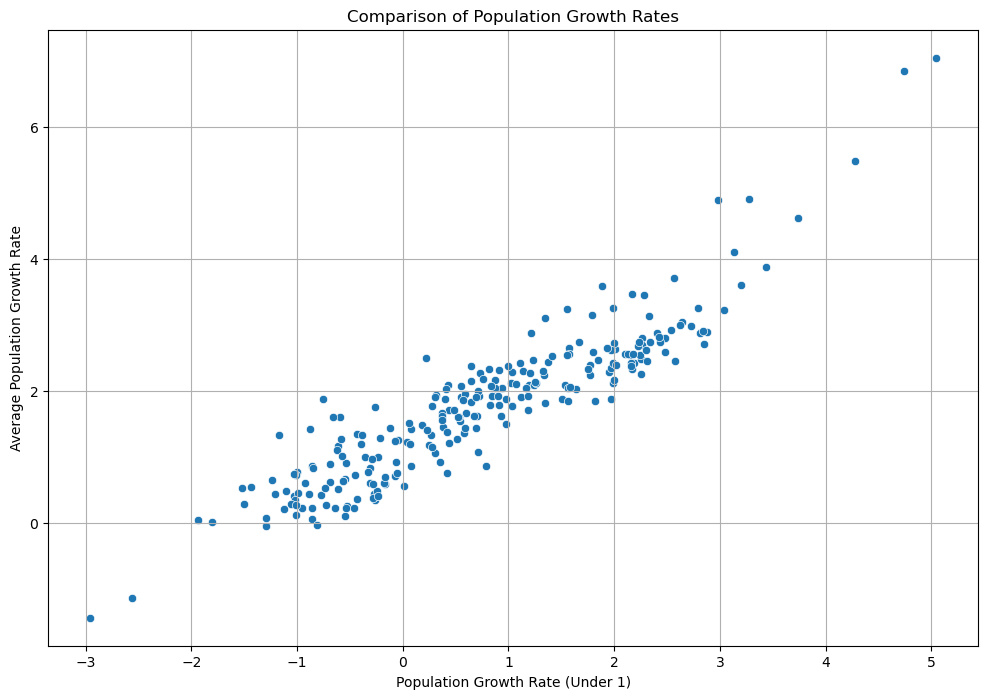

In [14]:
population_df = pd.merge(under_1, avg_growth, on='Country name', suffixes=('_under_1', '_avg_growth'))

f = plt.figure(figsize = (12, 8))
sb.scatterplot(data=population_df, x='Population Growth Rate_under_1', y='Population Growth Rate_avg_growth')
plt.title('Comparison of Population Growth Rates')
plt.xlabel('Population Growth Rate (Under 1)')
plt.ylabel('Average Population Growth Rate')
plt.grid(True)
plt.show()

#### Comparable, the mean number of youth per year has a linear relation with the mean growth rate of the population. This indicates that the country is going towards a youthful population.  This is evident from the scatterplot as well

In [15]:
# Looking into countries with negative avg growth to see their correlations

neg_avg_countries = avg_growth[avg_growth < 0].sort_values(ascending = True)

print(neg_avg_countries.head())

Country name
Montserrat   -1.434280
Niue         -1.130272
Bulgaria     -0.051008
Latvia       -0.030261
Name: Population Growth Rate, dtype: float64


In [16]:
under_1_countries = under_1[under_1 < 0].sort_values(ascending = True)

print(under_1_countries.head())

Country name
Montserrat              -2.953630
Niue                    -2.557371
Saint Helena            -1.932956
Saint Kitts and Nevis   -1.807753
Puerto Rico             -1.522277
Name: Population Growth Rate, dtype: float64


#### From the data collected, it can be seen that the declining birth rate of children (as shown in the under_1 countries) seems to cause the average growth rate of the population to decrease as well. This might signal a start of an ageing population, where respective government personnels can implement measures to tackle such problems. 

#### As for some of the data, it can be seen that despite the declining growth rate of the younger population, it seems that their population growth rate seems to be in the positive region. This generally implies that there is higher immigrants coming in to the country, which helps to boost external growth rate of their population, despite the decreased in birth rates. 
#### This can serve as possible intervention by the government to help curb the ageing population.

### We will now look into dependencies ratio of the various countries. This can be broken down into dependent population (Children < 15 and Adults > 65) and working-age population (15 < Adults < 64).

### Dependency Ratio = (Dependent Population / Working-Age Population) * 100
#### Higher dependency ratio implies that the overall economy face a higher burdern in supporting the ageing population

In [17]:
dependent_population = df['Population of children under the age of 15'] 
+ (df['Population older than 15 years'] - df['Population aged 15 to 64 years'])
    
working_age_population = df['Population aged 15 to 64 years']

df['Dependency Ratio'] = (dependent_population / working_age_population) * 100

print(df[['Country name', 'Year', 'Dependency Ratio']])

      Country name  Year  Dependency Ratio
0      Afghanistan  1950         73.092567
1      Afghanistan  1951         73.069236
2      Afghanistan  1952         73.082765
3      Afghanistan  1953         73.145202
4      Afghanistan  1954         73.292028
...            ...   ...               ...
18283     Zimbabwe  2017         77.181389
18284     Zimbabwe  2018         76.125337
18285     Zimbabwe  2019         75.145062
18286     Zimbabwe  2020         74.198369
18287     Zimbabwe  2021         73.359971

[18288 rows x 3 columns]


In [18]:
dependency_df = df[['Country name', 'Year', 'Dependency Ratio']]
dependency_df = mean_population_growth_rate(dependency_df, 'Dependency Ratio')

Country name
Niger               96.601238
Uganda              95.725714
Kenya               95.669379
Zambia              94.840280
Palestine           94.176657
Mayotte             93.812062
Marshall Islands    93.635146
Zimbabwe            90.439569
Burundi             90.045450
Rwanda              89.851394
Somalia             88.933516
Chad                88.675489
Yemen               88.371056
Afghanistan         88.370962
Sudan               88.303377
Tanzania            88.283880
Samoa               87.509283
Malawi              87.089574
Eswatini            86.960016
Angola              86.787277
Name: Dependency Ratio, dtype: float64


In [19]:
print(dependency_df.sort_values(ascending = True).head(n=10))

Country name
Monaco         21.636976
Jersey         25.724647
Germany        27.091347
Luxembourg     28.169264
Isle of Man    29.146204
Latvia         29.290504
Switzerland    29.299351
Guernsey       29.361565
Austria        29.361574
Italy          29.493257
Name: Dependency Ratio, dtype: float64


#### From what we can observe from the data, Niger and Uganda can be seen having high dependency ratio which indicates that the ratio of working population to the children and elderly population is almost 1 to 1. This can put high burden onto the working population. 
#### On the other hand, Monaco and Jersey has relatively low dependency ratio which puts lesser burden on the working population.

### Looking into the general trends of age group ratios, we can derive ratios or proportions of population within different age groups (e.g., children, working-age adults, elderly) relative to the total population. This can help identify shifts in age distributions over time.

In [20]:
#Calculate age group ratios
group_df = df[['Country name', 'Year']]

group_df.loc[:, ['children_ratio']] = df['Population of children under the age of 15'] / df['Population']
group_df.loc[:, ['working_adults_ratio']] = df['Population aged 15 to 64 years'] / df['Population']
group_df.loc[:, ['elderly_ratio']] = (df['Population older than 15 years'] - df['Population aged 15 to 64 years']) / df['Population']

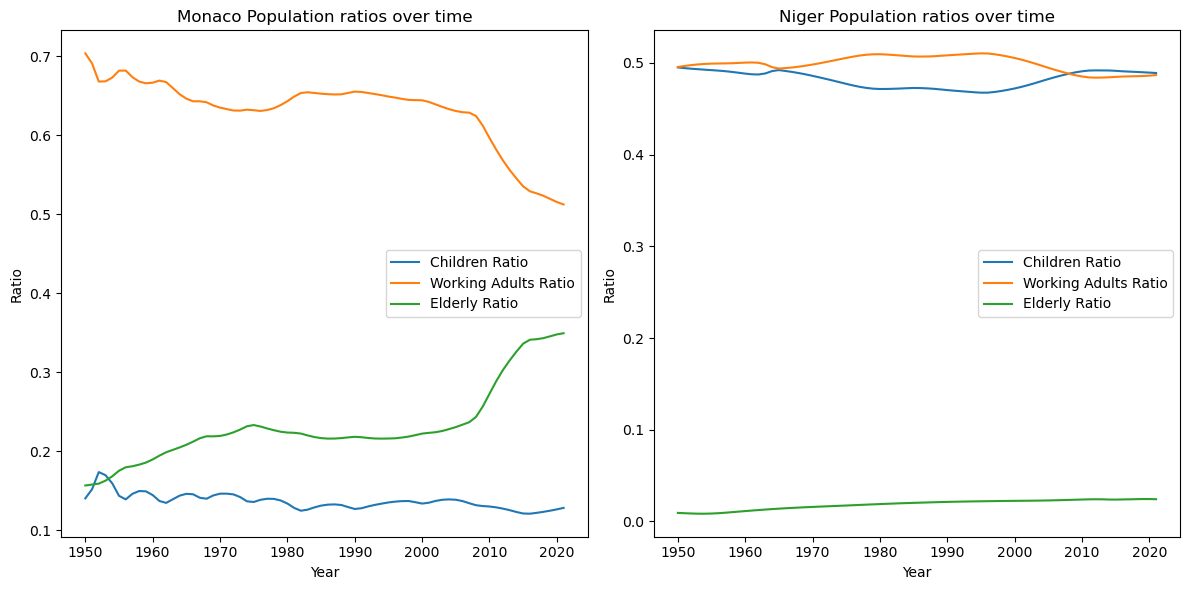

In [21]:
# Using the dependency ratio found previously, we want to see the trend for the most dependent and least dependent countries
# found in the dataset, namely niger and monaco respectively. 

#filter out the data for both countries
monaco_data = group_df[group_df['Country name'] == 'Monaco']
niger_data = group_df[group_df['Country name'] == 'Niger']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Monaco data
ax[0].plot(monaco_data['Year'], monaco_data['children_ratio'], label='Children Ratio')
ax[0].plot(monaco_data['Year'], monaco_data['working_adults_ratio'], label='Working Adults Ratio')
ax[0].plot(monaco_data['Year'], monaco_data['elderly_ratio'], label='Elderly Ratio')
ax[0].set_title('Monaco Population ratios over time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Ratio')
ax[0].legend()

# Plot Niger data
ax[1].plot(niger_data['Year'], niger_data['children_ratio'], label='Children Ratio')
ax[1].plot(niger_data['Year'], niger_data['working_adults_ratio'], label='Working Adults Ratio')
ax[1].plot(niger_data['Year'], niger_data['elderly_ratio'], label='Elderly Ratio')
ax[1].set_title('Niger Population ratios over time')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Ratio')
ax[1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### From the data shown, it is evident why there is a high dependency ratio in Niger compared to Monaco. Although the elderly ratio is rather low for Niger, the children to working adults ratio seems to be almost 1 to 1, which contributes heavily to the high dependency ratio for Niger. This can potential signal to countries that more policy can be taken in education so that the children can transition better into adulthood. 
#### As for Monaco, the ratio of elderly and children is relatively lesser compared to its working adults ratio, which contributes to her low dependency ratio. However, it is key to note that country is progressing towards an ageing population, as evident from the low children ratio, steep increase in elderly ratio and the falling working adults ratio. This can help to signal to policy makers about the need to curb the low birth rate and also to accomodate more facilities for the growing elderly population.

### To train the model to give us better prediction of the expected dependency ratio, we will be looking into Random Forest Regression as well as ARIMA (AutoRegressive Integrated Moving Average) time series forecasting to predict expected trends of different group ratios.

### Machine-learning model 1:

#### The first model we will be analysing will be Random Forest Regression, using the features of fertility rate, population growth and elderly ratio trends (life expectancy) to predict the expected dependency ratio for individual countries as time progresses. This can help government officials to better pre-planned necessary policies to help their population in the future.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

merged_features = pd.merge(group_df, df, on=['Country name', 'Year'])
merged_features = pd.merge(merged_features, population_growth, on=['Country name', 'Year'])
merged_features.dropna(inplace=True) 

selected_features = ['Population of children under the age of 1', 
                    'Population Growth Rate', 'elderly_ratio']

X = merged_features[selected_features].values 
y = df['Dependency Ratio'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [23]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 69.79243643274509
R-squared Score: 0.8825149395749277


#### As seen from the R2 and MSE score, it has shown that the model is able to predict the values with an accuracy of 0.882 in R2 score and a low mean squared error of 69.8.

#### However, it is important to note that though random forest regression model is able to somewhat predict the dependency ratio from the individual features, it is unable to forecast the dependency ratio for the future years.

### Machine-learning model 2:

#### Hence, we will be looking at the second model ARIMA (Autoregressive integrated moving average) which is able to forecast the individual data in the dataset by analysing the trend as well as identifying its p: The lag order, representing the number of lag observations incorporated in the model, d: Degree of differencing, denoting the number of times raw observations undergo differencing,  q: Order of moving average, indicating the size of the moving average window. 

#### This can be achieved through making use of auto arima that helps us to identify the proper model parameters suitable for different data that we are analysing. For implementation of this model, we will look into Singapore data to see how it forecast future predictions.

<Axes: xlabel='Year'>

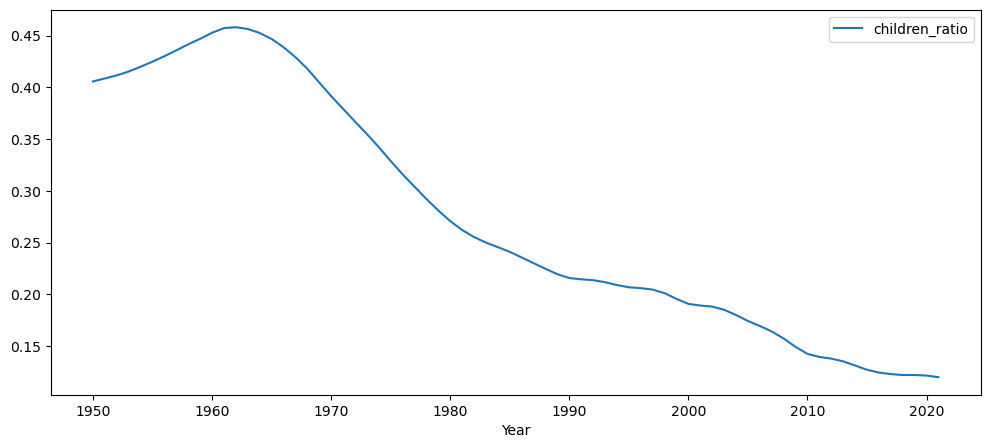

In [24]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

def get_country_data(df, country):
    country_data = df.copy()
    country_data = country_data[country_data['Country name'] == country]
    country_data.drop(country_data.columns[:1], axis=1, inplace=True)

    return country_data

country_data = get_country_data(merged_features, 'Singapore')
country_data.plot(x = 'Year', y = 'children_ratio', figsize=(12,5))

In [25]:
from statsmodels.tsa.stattools import adfuller

def adTest(data):
    datatest = adfuller(data, autolag = 'AIC')
    print("1) ADF: ", datatest[0])
    print("2) P-Value: ", datatest[1]) #Value to show whether this data set is suitable for ARIMA
    print("3) Num of lags: ", datatest[2])

    
adTest(country_data['children_ratio'])

1) ADF:  -3.4000435719289217
2) P-Value:  0.010957386334151
3) Num of lags:  10


In [26]:
# Get the best ARIMA model (p,d,q) values using auto ARIMA

def get_model(df, pred_col):
    step_fit = auto_arima(df[pred_col], trace=True, suppress_warnings = True)
    p, d, q = step_fit.order
    
    train = df.iloc[:-15]
    test = df.iloc[-15:]
    
    # From the auto ARIMA, we can see which ARIMA is the best model for this specific column for country_data

    model = ARIMA(train[pred_col], order = (p,d,q))
    model = model.fit()
    
    return model, train, test

In [27]:
model, train, test = get_model(country_data, 'children_ratio')
print(train.shape, test.shape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-788.270, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-538.285, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-726.581, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-508.049, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-789.291, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-708.694, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-788.167, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-788.537, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-736.636, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-785.643, Time=0.03 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-780.354, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-792.469, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-682.863, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : 

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         children_ratio   No. Observations:                   57
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 316.548
Date:                Sat, 20 Apr 2024   AIC                           -625.097
Time:                        20:53:26   BIC                           -616.996
Sample:                             0   HQIC                          -621.956
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9561      0.039     24.487      0.000       0.880       1.033
ma.L1          1.1544      0.114     10.089      0.000       0.930       1.379
ma.L2          0.3497      0.133      2.631      0.009       0.089       0.610
sigma2      6.424e-07   1.42e-07      4.539      0.000    3.65e-07     9.2e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.34   Prob(JB):                         0.89
Heteroskedasticity (H):               1.13   Skew:                            -0.08
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
pred.index = pred.index + 1950 #Match the index with the actual years
print(pred)

2007    0.165431
2008    0.161767
2009    0.158264
2010    0.154914
2011    0.151711
2012    0.148649
2013    0.145721
2014    0.142922
2015    0.140245
2016    0.137685
2017    0.135238
2018    0.132898
2019    0.130661
2020    0.128522
2021    0.126476
Name: predicted_mean, dtype: float64


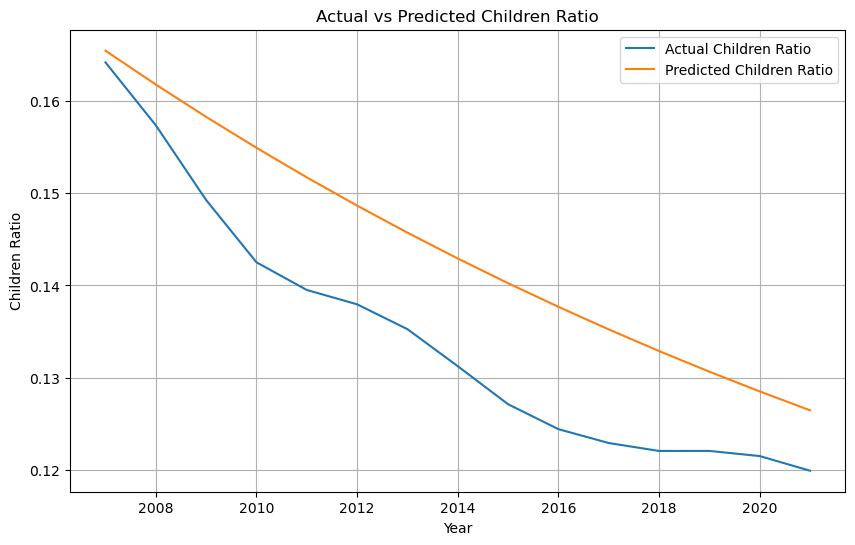

In [30]:
test.set_index('Year', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['children_ratio'], label='Actual Children Ratio')
plt.plot(test.index, pred.values, label='Predicted Children Ratio')
plt.xlabel('Year')
plt.ylabel('Children Ratio')
plt.title('Actual vs Predicted Children Ratio')
plt.legend()
plt.grid(True)
plt.show()

#### Looking into the graph of actual vs predicted value of children ratio, it is somewhat able to follow the trend. To analyse the accuracy of the model more clearly, we use RMSE to check for error deviation between actual vs predicted.

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['children_ratio']))
print(rmse)

0.01015361268216424


### To forecast future ratios, we simply increase the time frame of the dataset to include future years in the prediction model. Here, we examine the children ratio 10 years after 2021.

In [32]:
def predict_model(model, country_data, years):
    pred = model.predict(start=len(country_data), end=len(country_data)+years, typ = 'levels').rename('future predictions')
    pred.index = pred.index + 1950 #Match the index with the actual years
    
    return pred

In [33]:
pred = predict_model(model, country_data, 10)
print(pred)

2022    0.124521
2023    0.122651
2024    0.120863
2025    0.119153
2026    0.117519
2027    0.115956
2028    0.114461
2029    0.113032
2030    0.111666
2031    0.110360
2032    0.109111
Name: future predictions, dtype: float64


<Axes: >

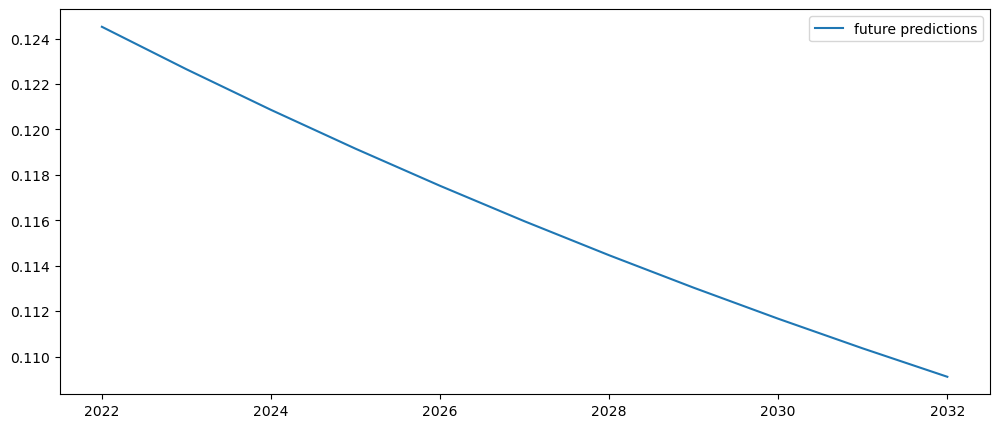

In [34]:
pred.plot(figsize = (12,5), legend=True)

### For this dataset, we have looked into dependency ratio, general trends of age groups as well as how higher birth rate can affect a countries population growth rate. To tackle future forecast for different age groups of individual countries, we looked into 2 different machine-learning techniques that help to predict future outcomes.

### Although random forest regression model works quite well in predicting the test cases, it was not our end goal in mind as we want to predict values past the actual timeline of the dataset. Hence, we feel that ARIMA model achieve its intended purpose of predicting future values for us and has a low RMSE when compared to the test case.

#### Lastly, we feel that by generating such prediction data by looking into current population trends, this can help to further aid government officials to implement certain policies to tackle issues that are signalled by the data collected from the model.

In [35]:
pip install dash plotly

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b0/68/781d0026a100106b64e4501c76621dfcd0d3c29a546094fcffaa73037a74/dash-2.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [36]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

app = dash.Dash(__name__)

columns_options = [
    {'label': 'Children Ratio', 'value': 'children_ratio'},
    {'label': 'Working Adults Ratio', 'value': 'working_adults_ratio'},
    {'label': 'Elderly Ratio', 'value': 'elderly_ratio'}
]

country_options = [{'label': country, 'value': country} for country in df['Country name'].unique()]

dropdown_styles = {
    'backgroundColor': 'white',  
    'color': 'black',  
}

app.layout = html.Div([
    html.H1('Country Data Dashboard from 1950 to 2021'),
    html.Div([
        dcc.Dropdown(id='country-dropdown', options=country_options, placeholder='Select a country', style = dropdown_styles),
        dcc.Input(id='years-input', type='number', placeholder='Enter years to predict', value=0),
        html.Button('Update Graphs', id='update-button', n_clicks=0),
    ]),
    dcc.RadioItems(
        id='column-selection',
        options=columns_options,
        value='children_ratio',  # Default selection
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id='graph1'),
    dcc.Graph(id='graph2'),
    dcc.Graph(id='graph3'),
    dcc.Graph(id='graph4'),
    dcc.Graph(id='graph5'),
])

# Callback to update graphs based on user input
@app.callback(
    [Output('graph1', 'figure'),
     Output('graph2', 'figure'),
     Output('graph3', 'figure'),
     Output('graph4', 'figure'),
     Output('graph5', 'figure')],
    [Input('update-button', 'n_clicks')],
    [Input('country-dropdown', 'value'),
     Input('years-input', 'value'),
     Input('column-selection', 'value')]
)
def update_graphs(n_clicks, country, years, selected_column):
    if n_clicks > 0 and country:
        country_data = get_country_data(merged_features, country)
        if years == None:
            years = 0
            
        if years < 0:
            raise ValueError('Invalid number of years. Years to predict must be greater than 0 and integer.')
            
        if years > 0:
            model, train, test = get_model(country_data, selected_column)
            pred = predict_model(model, country_data, years)
            
            fig1 = {'data': [{'x': country_data['Year'], 'y': country_data[selected_column], 'type': 'line', 'name': selected_column}],
                    'layout': {'title': f'{selected_column} over time'}}
            fig2 = {'data': [{'x': pred.index, 'y': pred, 'type': 'line', 'name': 'Predicted Values'}],
                     'layout': {'title': f'Predicted {selected_column} for {country} in {years} years'}}
            fig3 = {'data': [{'x': country_data['Year'], 'y': country_data['Population Growth Rate'], 'type': 'line', 'name': 'Population Growth Rate'}],
                    'layout': {'title': 'Population Growth Rate over Time', 'xaxis': {'title': 'Year', 'range': [1951, max(country_data['Year'])]}, 'yaxis': {'title': 'Growth Rate'}}}
            fig4 = {'data': [{'x': country_data['Year'], 'y': country_data['Dependency Ratio'], 'type': 'line', 'name': 'Dependency Ratio'}],
                     'layout': {'title': 'Dependency ratio over time'}}
            fig5 = {'data': [{'x': country_data['Year'], 'y': country_data['Population of children under the age of 1'], 'type': 'line', 'name': 'Birth rate'}],
                    'layout': {'title': 'Birth rate over time'}}
            return fig1, fig2, fig3, fig4, fig5
        
        else:
            
            fig1 = {'data': [{'x': country_data['Year'], 'y': country_data[selected_column], 'type': 'line', 'name': selected_column}],
                    'layout': {'title': f'{selected_column} over time'}}
            fig2 = {}
            fig3 = {'data': [{'x': country_data['Year'], 'y': country_data['Population Growth Rate'], 'type': 'line', 'name': 'Population Growth Rate'}],
                    'layout': {'title': 'Population Growth Rate over Time', 'xaxis': {'title': 'Year', 'range': [1951, max(country_data['Year'])]}, 'yaxis': {'title': 'Growth Rate'}}}
            fig4 = {'data': [{'x': country_data['Year'], 'y': country_data['Dependency Ratio'], 'type': 'line', 'name': 'Dependency Ratio'}],
                     'layout': {'title': 'Dependency ratio over time'}}
            fig5 = {'data': [{'x': country_data['Year'], 'y': country_data['Population of children under the age of 1'], 'type': 'line', 'name': 'Birth rate'}],
                    'layout': {'title': 'Birth rate over time'}}
            
            return fig1, fig2, fig3, fig4, fig5
    else:
        # Return default or empty figures
        return {}, {}, {}, {}, {}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-685.689, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-697.836, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-697.453, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-698.128, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-694.022, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-720.445, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-684.283, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-691.838, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-689.262, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-719.255, Time=0.07 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.379 seconds
Performing stepwise search to minimize aic
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-866.698, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-830.883, Time=0.04 sec
 A

 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-958.327, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-793.633, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-961.247, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-914.641, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-954.864, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-961.319, Time=0.05 sec
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-898.919, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-906.871, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-937.734, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-962.398, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-959.029, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-952.259, Time=0.19 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-948.391, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-958.327, Time=0.16 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept